Final Machine Learning Experiment to perform the sudo sentimental prediction based on movie review data to simulate the legal document and its corresponding legal result 

In [1]:
# Import movie review data
import pandas as pd
df = pd.read_csv('movie_data.csv')
df.head(10)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


In [2]:
# Text preprocessing
import re
def preprocessor(text):
  text =re.sub('<[^>]*>', '', text)
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
  
  return text
df['review']=df['review'].apply(preprocessor)

In [3]:
# Tokenization
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
  return text.split()

def tokenizer_stemmer(text):
  return[porter.stem(word) for word in text.split()]

In [4]:
# Remove stopword prep
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [5]:
# TF_IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                         lowercase=True,
                         preprocessor=None,  # applied preprocessor in Data Cleaning
                         tokenizer=tokenizer_stemmer,
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)

In [6]:
# Claim input and output
y = df.sentiment.values
X = tfidf.fit_transform(df.review)

In [7]:
# Split train - test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.4, shuffle=False)

Now Try different models to train the data

1. Naive Bayes Model

In [8]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

85.11%


2. Complement Naive Bayes (CNB)

In [9]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.4, shuffle=False)
#Defining and compiling the model -> we will use ComplementNB
from sklearn.naive_bayes import ComplementNB

#Fitting the model
CNB = ComplementNB()
CNB.fit(X_train, y_train)

#evaluating the model
#from sklearn import metrics
accuracy_score = metrics.accuracy_score(CNB.predict(X_test),y_test)

print(str('{:4.2f}'.format(accuracy_score*100))+'%')

85.13%


3. Non-bayseian methods

In [14]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
SGDC = SGDClassifier()
LSVC = LinearSVC()

LSVC.fit(X_train, y_train)
accuracy_score_lsvc = metrics.accuracy_score(LSVC.predict(X_test), y_test)
print('accuracy_score_lsvc = '+str('{:4.2f}'.format(accuracy_score_lsvc*100))+'%')

SGDC.fit(X_train, y_train)
accuracy_score_sgdc = metrics.accuracy_score(SGDC.predict(X_test), y_test)
print('accuracy_score_sgdc = '+str('{:4.2f}'.format(accuracy_score_sgdc*100))+'%')

accuracy_score_lsvc = 89.51%
accuracy_score_sgdc = 89.45%


Choose the LSVC model which has the highest accuracy

In [15]:
import pickle
save_model = open('save_model.sav','wb')
pickle.dump(LSVC, save_model)
save_model.close()

In [19]:
y_pred = LSVC.predict(X_test)
y_act = y_test

In [21]:
print(metrics.confusion_matrix(y_act, y_pred, labels=[0,1]))

[[8923 1071]
 [1027 8979]]


In [22]:
print(metrics.classification_report(y_act, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      9994
           1       0.89      0.90      0.90     10006

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



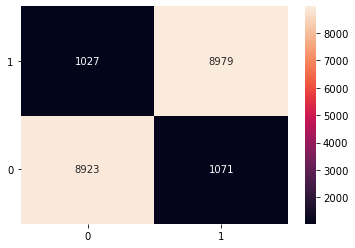

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_act, y_pred, labels=[0,1])


# Plot non-normalized confusion matrix
import seaborn as sns


annot_kws = {"ha": 'left',"va": 'top'}
ax = sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.yticks(rotation = 0)
ax.invert_yaxis()

#ax.set_ylim([0])

plt.show()

Review the word cloud in the review

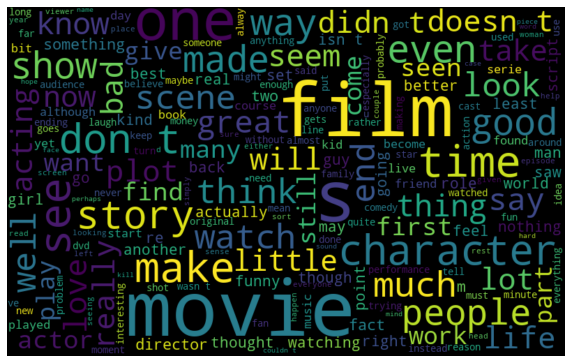

In [26]:
all_words = ' '.join([text for text in df['review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

View the word cloud under different sentiment

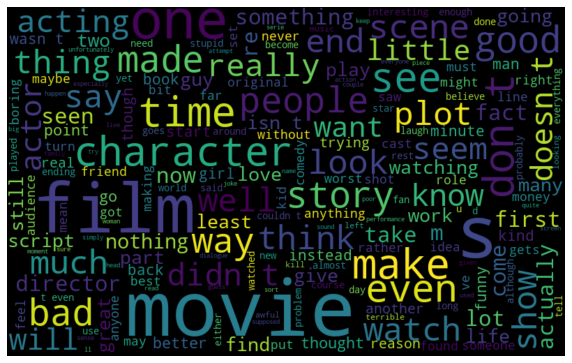

In [28]:
# negative
ex_neg = ' '.join([text for text in df['review'][df['sentiment'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(ex_neg)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

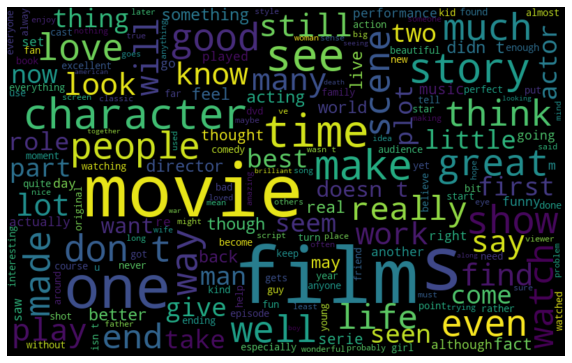

In [30]:
# positive
pos = ' '.join([text for text in df['review'][df['sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

ROC and AUC of LSVC

In [36]:
import sklearn.metrics as metrics
preds = LSVC.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

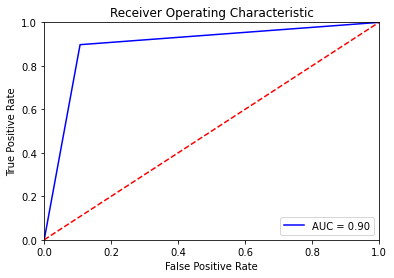

In [37]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()